In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df_death = pd.read_csv('Deaths.csv')
df_rec = pd.read_csv('Recovered.csv')
df_con = pd.read_csv('Confirmed.csv')

In [50]:
df_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,19,22,22,27,29,29,29,33,35,40
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,2,2,2,3,4,10


In [51]:
df_death.drop(['Province/State','Lat','Long'],axis = 1,inplace = True)
df_rec.drop(['Province/State','Lat','Long'],axis = 1,inplace = True)
df_con.drop(['Province/State','Lat','Long'],axis = 1,inplace = True)

In [52]:
# df.set_index('Country/Region',inplace = True)
df_death['Total'] = df_death.sum(axis = 1)
df_con['Total'] = df_death.sum(axis = 1)
df_rec['Total'] = df_death.sum(axis = 1)

In [53]:
df_death = df_death.set_index('Country/Region')
df_con = df_con.set_index('Country/Region')
df_rec = df_rec.set_index('Country/Region')

In [54]:
# df_top10 = df.sort_values('Total',ascending = False)
df_death_sum = df_death.groupby('Country/Region').sum()
df_con_sum = df_con.groupby('Country/Region').sum()
df_rec_sum = df_rec.groupby('Country/Region').sum()

# df_top = df_top.sort_values('3/20/20',ascending = False)
# df_top.head()

In [64]:
# df_death_sum['Total'] = df_death_sum.sum(axis = 1)
# df_con_sum.sort_values('Total',ascending = False).head()

data = pd.DataFrame(index = df_death_sum.index.values)

In [65]:
temp1 = df_rec_sum.loc['Kenya'].copy()
temp2 = df_rec_sum.loc['Guinea'].copy()
temp3 = df_rec_sum.loc['Canada'].copy()

print(temp3)

# df_rec_sum.loc['Kenya'] = temp2
# df_rec_sum.loc['Guinea'] = temp3
# df_rec_sum.loc['Canada'] = temp1

# df_rec.rename(index={'Kenya': 'Guinea','Guinea':'Canada','Canada':'Kenya'},inplace = True)

1/22/20      0
1/23/20      0
1/24/20      0
1/25/20      0
1/26/20      0
1/27/20      0
1/28/20      0
1/29/20      0
1/30/20      0
1/31/20      0
2/1/20       0
2/2/20       0
2/3/20       0
2/4/20       0
2/5/20       0
2/6/20       0
2/7/20       0
2/8/20       0
2/9/20       0
2/10/20      0
2/11/20      0
2/12/20      1
2/13/20      1
2/14/20      1
2/15/20      1
2/16/20      1
2/17/20      1
2/18/20      1
2/19/20      1
2/20/20      1
          ... 
2/23/20      3
2/24/20      3
2/25/20      3
2/26/20      3
2/27/20      6
2/28/20      6
2/29/20      6
3/1/20       6
3/2/20       6
3/3/20       6
3/4/20       6
3/5/20       6
3/6/20       6
3/7/20       8
3/8/20       8
3/9/20       8
3/10/20      8
3/11/20      8
3/12/20      8
3/13/20      8
3/14/20      8
3/15/20      8
3/16/20      9
3/17/20      9
3/18/20      9
3/19/20      9
3/20/20      9
3/21/20     10
3/22/20     10
Total      170
Name: Canada, Length: 62, dtype: int64


In [66]:
data['death'] = df_death_sum['3/22/20']
data['confirmed'] = df_con_sum['3/22/20']
# data.drop('recovered',axis = 1,inplace = True)
data['recov'] = df_rec_sum['3/22/20']

In [67]:
# data.loc['China']

death         3265
confirmed    81397
recov        72362
Name: China, dtype: int64

In [39]:
# columns = df_top.columns
df_top.drop('Total',axis = 1).head(5)
df_top.columns.name = 'days'
# df_top
df_top.head(5).T.plot(kind = 'line',figsize = (20,10),linewidth=2.5)

NameError: name 'df_top' is not defined

In [144]:
data_plot = data.sort_values('confirmed',ascending = False).head(8)

In [78]:
data_plot.reset_index(inplace = True)

In [125]:
data_plot.head()

,death,confirmed,recov
China,3265,81397,72362
Italy,5476,59138,7024
US,417,33272,0
Spain,1772,28768,2575
Germany,94,24873,266


['China' 'Italy' 'US' 'Spain' 'Germany' 'Iran' 'France' 'Korea, South']


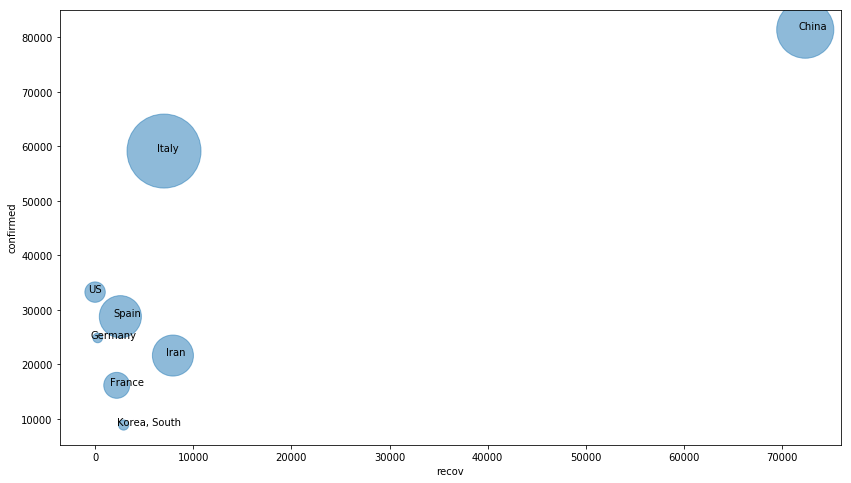

In [146]:
x = data_plot.recov.values
y = data_plot.confirmed.values
ax = data_plot.plot(kind='scatter',
                    x='recov',
                    y='confirmed',
                    figsize=(14, 8),
#                     label = data_plot.index.values,
                    alpha=0.5,                  # transparency
#                     color='green',
                    s=data_plot.death.values,  # pass in weights 
                   )
# ax.scatter()

n = data_plot.index.values
print(n)

# ax.annotate('China',(72362,81397))
for i, txt in enumerate(n):
    ax.annotate(str(txt), (x[i]-700, y[i]))
#     print(txt,x[i],y[i])